In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_error
from sklearn.model_selection import cross_val_score
from rfpimp import *
from sklearn.model_selection import train_test_split

C:\Users\jungj\AppData\Roaming\Python\Python37\site-packages\sklearn\utils\deprecation.py:143: FutureWarning: The sklearn.ensemble.forest module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.ensemble. Anything that cannot be imported from sklearn.ensemble is now part of the private API.
  warnings.warn(message, FutureWarning)


### Reading data with grouped block and turnout ratio

In [2]:
merged_df = pd.read_csv("df_grouped_turnout.csv")
merged_df.head()

,Unnamed: 0,Unnamed: 0.1,ALAND,AWATER,BLKGRPCE,COUNTYFP,E11B19001e1,E11B19001e13,E11B19001e2,E11B19013e1,...,D01B01001e44-46,D01B01001e47-49,S07B15003e15-17,S07B15003e18-21,S07B15003e23-25,E11B19001e3-5,E11B19001e6-10,E11B19001e11-12,E11B19001e14-15,E11B19001e16-17
0,0,0,337300,0,3,59,688,83,115,62019.0,...,44.0,18.0,135.0,405.0,87.0,60.0,114.0,156.0,88.0,72.0
1,1,1,686935,0,1,59,1280,262,61,82353.0,...,121.0,44.0,231.0,780.0,312.0,40.0,179.0,223.0,172.0,343.0
2,2,2,209303,0,2,59,321,17,6,23924.0,...,68.0,71.0,109.0,179.0,120.0,170.0,30.0,59.0,0.0,39.0
3,3,3,323900,0,2,59,417,40,0,112132.0,...,44.0,8.0,121.0,279.0,151.0,47.0,53.0,31.0,152.0,94.0
4,4,4,323906,0,1,59,370,38,7,106250.0,...,47.0,58.0,85.0,130.0,122.0,17.0,27.0,91.0,33.0,157.0


### Check whether there is null data

In [3]:
merged_df.isnull().sum()

Unnamed: 0         0
Unnamed: 0.1       0
ALAND              0
AWATER             0
BLKGRPCE           0
                  ..
E11B19001e3-5      0
E11B19001e6-10     0
E11B19001e11-12    0
E11B19001e14-15    0
E11B19001e16-17    0
Length: 94, dtype: int64

In [4]:
nans = merged_df.loc[:, (merged_df.isnull().sum() > 0)].columns.tolist()

In [5]:
merged_df.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', 'ALAND', 'AWATER', 'BLKGRPCE', 'COUNTYFP',
       'E11B19001e1', 'E11B19001e13', 'E11B19001e2', 'E11B19013e1',
       'E11B19025e1', 'E11B19055e2', 'E11B19059e2', 'E12B19113e1',
       'E12B20002e1', 'E12B20002e2', 'E12B20002e3', 'E13B19101e1', 'FUNCSTAT',
       'GEOID', 'GEOID_Data', 'INTPTLAT', 'INTPTLON', 'MTFCC', 'NAMELSAD',
       'OBJECTID', 'STATEFP', 'Shape__Area', 'Shape__Length', 'TRACTCE',
       'H07B25003e2', 'H07B25003e3', 'H18B25081e1', 'H18B25081e2',
       'H18B25081e4', 'H18B25081e5', 'H18B25081e6', 'H18B25081e7',
       'H18B25081e8', 'H18B25082e1', 'H18B25082e2', 'H18B25082e3',
       'D01B01001e1', 'D01B01001e2', 'D01B01001e26', 'D02B01002Ae1',
       'D02B01002Be1', 'D02B01002Ce1', 'D02B01002De1', 'D02B01002Ee1',
       'D02B01002Fe1', 'D02B01002Ge1', 'D02B01002He1', 'D02B01002Ie1',
       'D02B01002e1', 'D02B01002e2', 'D02B01002e3', 'D03B02001e1',
       'D03B02001e2', 'D03B02001e3', 'D03B02001e4', 'D03B02001e5',
       'D03B

### Additional Step removing redundant feature based on further analysis

In [6]:
drop_columns = ["D01B01001e1", "D01B01001e2", "D01B01001e26", "D02B01002e1", "E11B19013e1", "E11B19025e1", "E12B19113e1", "E13B19101e1", "H18B25081e7", "H18B25081e4", "H18B25081e5", "H18B25081e6", "D02B01002e2", "D02B01002e3", "D03B02001e1", "E12B20002e1"]

In [7]:
merged_df = merged_df.drop(drop_columns, axis=1)

### Fill zero for null data positions

In [8]:
new_df = merged_df.fillna(0)

In [9]:
no_nans = new_df.loc[:, (new_df.isnull().sum() > 0)].columns.tolist()

In [10]:
print(nans)
print(no_nans)

['E11B19013e1', 'E12B19113e1', 'E12B20002e1', 'E12B20002e2', 'E12B20002e3', 'H18B25082e1', 'H18B25082e2', 'H18B25082e3', 'D02B01002Be1', 'D02B01002Ce1', 'D02B01002De1', 'D02B01002Ee1', 'D02B01002Fe1', 'D02B01002Ge1', 'D02B01002Ie1']
[]


In [11]:
new_df.dtypes

Unnamed: 0           int64
Unnamed: 0.1         int64
ALAND                int64
AWATER               int64
BLKGRPCE             int64
                    ...   
E11B19001e3-5      float64
E11B19001e6-10     float64
E11B19001e11-12    float64
E11B19001e14-15    float64
E11B19001e16-17    float64
Length: 78, dtype: object

### Drop uninterested columns from data frame for analysis

In [12]:
clean_df = new_df.drop(['FUNCSTAT', 'MTFCC', 'Unnamed: 0', 'Unnamed: 0.1', 'INTPTLAT', 'INTPTLON', 'Shape__Area', 'Shape__Length', 'TRACTCE', 'OBJECTID', 'STATEFP', 'GEOID_Data', 'NAMELSAD', 'ALAND', 'AWATER',  'BLKGRPCE', 'COUNTYFP'], axis=1)
clean_df

,E11B19001e1,E11B19001e13,E11B19001e2,E11B19055e2,E11B19059e2,E12B20002e2,E12B20002e3,GEOID,H07B25003e2,H07B25003e3,...,D01B01001e44-46,D01B01001e47-49,S07B15003e15-17,S07B15003e18-21,S07B15003e23-25,E11B19001e3-5,E11B19001e6-10,E11B19001e11-12,E11B19001e14-15,E11B19001e16-17
0,688,83,115,83,40,37778.0,40027.0,60590632013,141,547,...,44.0,18.0,135.0,405.0,87.0,60.0,114.0,156.0,88.0,72.0
1,1280,262,61,198,101,54193.0,65625.0,60590638071,301,979,...,121.0,44.0,231.0,780.0,312.0,40.0,179.0,223.0,172.0,343.0
2,321,17,6,149,28,32019.0,20625.0,60590637022,8,313,...,68.0,71.0,109.0,179.0,120.0,170.0,30.0,59.0,0.0,39.0
3,417,40,0,79,46,54653.0,55408.0,60590633022,86,331,...,44.0,8.0,121.0,279.0,151.0,47.0,53.0,31.0,152.0,94.0
4,370,38,7,114,56,0.0,49583.0,60590633021,300,70,...,47.0,58.0,85.0,130.0,122.0,17.0,27.0,91.0,33.0,157.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,931,161,80,121,119,31538.0,38636.0,60590639063,296,635,...,59.0,17.0,266.0,395.0,166.0,29.0,230.0,153.0,222.0,56.0
72,474,54,68,103,0,0.0,21513.0,60590639023,0,474,...,52.0,13.0,321.0,280.0,13.0,38.0,143.0,59.0,41.0,71.0
73,632,133,13,89,83,48671.0,22076.0,60590639024,20,612,...,20.0,0.0,132.0,217.0,174.0,48.0,114.0,89.0,133.0,102.0
74,613,55,18,299,205,55950.0,49018.0,60590639053,414,199,...,82.0,178.0,190.0,393.0,146.0,51.0,146.0,78.0,93.0,172.0


### Set "GEOID" as Index for the data frame

In [13]:
clean_df.set_index('GEOID', inplace = True)
clean_df

,E11B19001e1,E11B19001e13,E11B19001e2,E11B19055e2,E11B19059e2,E12B20002e2,E12B20002e3,H07B25003e2,H07B25003e3,H18B25081e1,...,D01B01001e44-46,D01B01001e47-49,S07B15003e15-17,S07B15003e18-21,S07B15003e23-25,E11B19001e3-5,E11B19001e6-10,E11B19001e11-12,E11B19001e14-15,E11B19001e16-17
GEOID,,,,,,,,,,,,,,,,,,,,,
60590632013,688,83,115,83,40,37778.0,40027.0,141,547,141,...,44.0,18.0,135.0,405.0,87.0,60.0,114.0,156.0,88.0,72.0
60590638071,1280,262,61,198,101,54193.0,65625.0,301,979,301,...,121.0,44.0,231.0,780.0,312.0,40.0,179.0,223.0,172.0,343.0
60590637022,321,17,6,149,28,32019.0,20625.0,8,313,8,...,68.0,71.0,109.0,179.0,120.0,170.0,30.0,59.0,0.0,39.0
60590633022,417,40,0,79,46,54653.0,55408.0,86,331,86,...,44.0,8.0,121.0,279.0,151.0,47.0,53.0,31.0,152.0,94.0
60590633021,370,38,7,114,56,0.0,49583.0,300,70,300,...,47.0,58.0,85.0,130.0,122.0,17.0,27.0,91.0,33.0,157.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60590639063,931,161,80,121,119,31538.0,38636.0,296,635,296,...,59.0,17.0,266.0,395.0,166.0,29.0,230.0,153.0,222.0,56.0
60590639023,474,54,68,103,0,0.0,21513.0,0,474,0,...,52.0,13.0,321.0,280.0,13.0,38.0,143.0,59.0,41.0,71.0
60590639024,632,133,13,89,83,48671.0,22076.0,20,612,20,...,20.0,0.0,132.0,217.0,174.0,48.0,114.0,89.0,133.0,102.0


### --> At last we get total 60 features for analysis

### Analysis

In [14]:
clean_df.columns

Index(['E11B19001e1', 'E11B19001e13', 'E11B19001e2', 'E11B19055e2',
       'E11B19059e2', 'E12B20002e2', 'E12B20002e3', 'H07B25003e2',
       'H07B25003e3', 'H18B25081e1', 'H18B25081e2', 'H18B25081e8',
       'H18B25082e1', 'H18B25082e2', 'H18B25082e3', 'D02B01002Ae1',
       'D02B01002Be1', 'D02B01002Ce1', 'D02B01002De1', 'D02B01002Ee1',
       'D02B01002Fe1', 'D02B01002Ge1', 'D02B01002He1', 'D02B01002Ie1',
       'D03B02001e2', 'D03B02001e3', 'D03B02001e4', 'D03B02001e5',
       'D03B02001e6', 'D03B02001e7', 'D03B02001e8', 'D04B02001e1',
       'S01B11001e1', 'S02B09019e2', 'S07B15003e22', 'S08B21001e1',
       'S08B21001e2', 'S19B28008e10', 'S19B28008e2', 'S19B28008e4',
       'S19B28008e9', 'Voter_Turnout', 'D01B01001e7-10', 'D01B01001e11-14',
       'D01B01001e15-19', 'D01B01001e20-22', 'D01B01001e23-25',
       'D01B01001e31-34', 'D01B01001e35-38', 'D01B01001e39-43',
       'D01B01001e44-46', 'D01B01001e47-49', 'S07B15003e15-17',
       'S07B15003e18-21', 'S07B15003e23-25', 'E11B

### We set y as true or false for voter turnout ratio > 75%

In [15]:
y = clean_df['Voter_Turnout'] >= 75
X = clean_df.copy()
del X['Voter_Turnout']

In [16]:
y

GEOID
60590632013     True
60590638071     True
60590637022     True
60590633022     True
60590633021    False
               ...  
60590639063     True
60590639023    False
60590639024    False
60590639053     True
60590639084     True
Name: Voter_Turnout, Length: 76, dtype: bool

In [17]:
X.head()

,E11B19001e1,E11B19001e13,E11B19001e2,E11B19055e2,E11B19059e2,E12B20002e2,E12B20002e3,H07B25003e2,H07B25003e3,H18B25081e1,...,D01B01001e44-46,D01B01001e47-49,S07B15003e15-17,S07B15003e18-21,S07B15003e23-25,E11B19001e3-5,E11B19001e6-10,E11B19001e11-12,E11B19001e14-15,E11B19001e16-17
GEOID,,,,,,,,,,,,,,,,,,,,,
60590632013,688,83,115,83,40,37778.0,40027.0,141,547,141,...,44.0,18.0,135.0,405.0,87.0,60.0,114.0,156.0,88.0,72.0
60590638071,1280,262,61,198,101,54193.0,65625.0,301,979,301,...,121.0,44.0,231.0,780.0,312.0,40.0,179.0,223.0,172.0,343.0
60590637022,321,17,6,149,28,32019.0,20625.0,8,313,8,...,68.0,71.0,109.0,179.0,120.0,170.0,30.0,59.0,0.0,39.0
60590633022,417,40,0,79,46,54653.0,55408.0,86,331,86,...,44.0,8.0,121.0,279.0,151.0,47.0,53.0,31.0,152.0,94.0
60590633021,370,38,7,114,56,0.0,49583.0,300,70,300,...,47.0,58.0,85.0,130.0,122.0,17.0,27.0,91.0,33.0,157.0


In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=42, test_size=0.2)

In [19]:
rf = RandomForestRegressor(oob_score=True, n_estimators=100)
rf.fit(X_train, y_train)

RandomForestRegressor(oob_score=True)

In [20]:
X_test.shape, X_train.shape

((16, 59), (60, 59))

Wall time: 510 ms


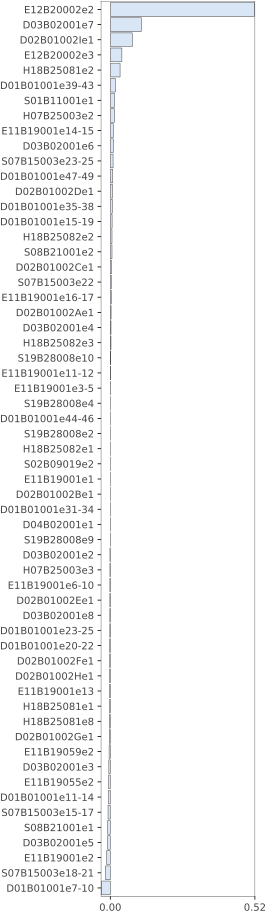

In [21]:
%time I = importances(rf, X_test, y_test)
viz = plot_importances(I)
viz

In [22]:
I.head(10)

,Importance
Feature,
E12B20002e2,0.518359
D03B02001e7,0.111385
D02B01002Ie1,0.079015
E12B20002e3,0.041600
H18B25081e2,0.035159
D01B01001e39-43,0.017887
S01B11001e1,0.015056
H07B25003e2,0.014810
E11B19001e14-15,0.011159


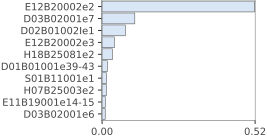

In [23]:
viz = plot_importances(I.head(10))
viz.save('./importances_list_10.svg')
viz

### for Feature correlation using codes rfpimp

In [25]:
X_train['random'] = np.random.random(size=len(X_train))
X_test['random'] = np.random.random(size=len(X_test))

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [26]:
rf = RandomForestRegressor(n_estimators=100, min_samples_leaf=5,n_jobs=-1,oob_score=True)
rf.fit(X_train, y_train)

RandomForestRegressor(min_samples_leaf=5, n_jobs=-1, oob_score=True)

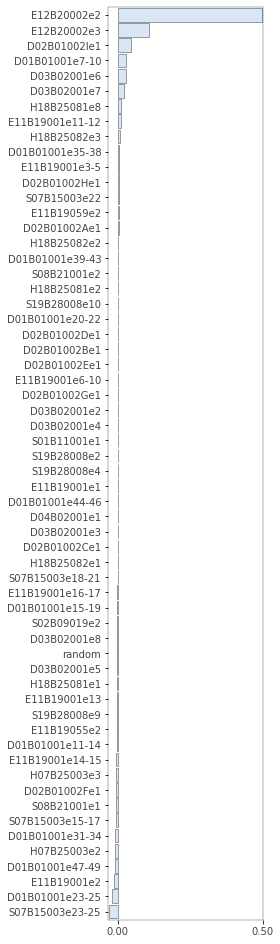

In [27]:
imp = importances(rf, X_test, y_test)
viz = plot_importances(imp)
viz.view()

In [28]:
clean_df.columns

Index(['E11B19001e1', 'E11B19001e13', 'E11B19001e2', 'E11B19055e2',
       'E11B19059e2', 'E12B20002e2', 'E12B20002e3', 'H07B25003e2',
       'H07B25003e3', 'H18B25081e1', 'H18B25081e2', 'H18B25081e8',
       'H18B25082e1', 'H18B25082e2', 'H18B25082e3', 'D02B01002Ae1',
       'D02B01002Be1', 'D02B01002Ce1', 'D02B01002De1', 'D02B01002Ee1',
       'D02B01002Fe1', 'D02B01002Ge1', 'D02B01002He1', 'D02B01002Ie1',
       'D03B02001e2', 'D03B02001e3', 'D03B02001e4', 'D03B02001e5',
       'D03B02001e6', 'D03B02001e7', 'D03B02001e8', 'D04B02001e1',
       'S01B11001e1', 'S02B09019e2', 'S07B15003e22', 'S08B21001e1',
       'S08B21001e2', 'S19B28008e10', 'S19B28008e2', 'S19B28008e4',
       'S19B28008e9', 'Voter_Turnout', 'D01B01001e7-10', 'D01B01001e11-14',
       'D01B01001e15-19', 'D01B01001e20-22', 'D01B01001e23-25',
       'D01B01001e31-34', 'D01B01001e35-38', 'D01B01001e39-43',
       'D01B01001e44-46', 'D01B01001e47-49', 'S07B15003e15-17',
       'S07B15003e18-21', 'S07B15003e23-25', 'E11B

In [29]:
clean_df["y"] = clean_df['Voter_Turnout'] >= 75

In [30]:
clean_df.columns

Index(['E11B19001e1', 'E11B19001e13', 'E11B19001e2', 'E11B19055e2',
       'E11B19059e2', 'E12B20002e2', 'E12B20002e3', 'H07B25003e2',
       'H07B25003e3', 'H18B25081e1', 'H18B25081e2', 'H18B25081e8',
       'H18B25082e1', 'H18B25082e2', 'H18B25082e3', 'D02B01002Ae1',
       'D02B01002Be1', 'D02B01002Ce1', 'D02B01002De1', 'D02B01002Ee1',
       'D02B01002Fe1', 'D02B01002Ge1', 'D02B01002He1', 'D02B01002Ie1',
       'D03B02001e2', 'D03B02001e3', 'D03B02001e4', 'D03B02001e5',
       'D03B02001e6', 'D03B02001e7', 'D03B02001e8', 'D04B02001e1',
       'S01B11001e1', 'S02B09019e2', 'S07B15003e22', 'S08B21001e1',
       'S08B21001e2', 'S19B28008e10', 'S19B28008e2', 'S19B28008e4',
       'S19B28008e9', 'Voter_Turnout', 'D01B01001e7-10', 'D01B01001e11-14',
       'D01B01001e15-19', 'D01B01001e20-22', 'D01B01001e23-25',
       'D01B01001e31-34', 'D01B01001e35-38', 'D01B01001e39-43',
       'D01B01001e44-46', 'D01B01001e47-49', 'S07B15003e15-17',
       'S07B15003e18-21', 'S07B15003e23-25', 'E11B

In [31]:
df_all = clean_df.copy()

In [32]:
features = X.columns.tolist()
target = "y"
df = df_all[features + [target]]

In [33]:
df.columns

Index(['E11B19001e1', 'E11B19001e13', 'E11B19001e2', 'E11B19055e2',
       'E11B19059e2', 'E12B20002e2', 'E12B20002e3', 'H07B25003e2',
       'H07B25003e3', 'H18B25081e1', 'H18B25081e2', 'H18B25081e8',
       'H18B25082e1', 'H18B25082e2', 'H18B25082e3', 'D02B01002Ae1',
       'D02B01002Be1', 'D02B01002Ce1', 'D02B01002De1', 'D02B01002Ee1',
       'D02B01002Fe1', 'D02B01002Ge1', 'D02B01002He1', 'D02B01002Ie1',
       'D03B02001e2', 'D03B02001e3', 'D03B02001e4', 'D03B02001e5',
       'D03B02001e6', 'D03B02001e7', 'D03B02001e8', 'D04B02001e1',
       'S01B11001e1', 'S02B09019e2', 'S07B15003e22', 'S08B21001e1',
       'S08B21001e2', 'S19B28008e10', 'S19B28008e2', 'S19B28008e4',
       'S19B28008e9', 'D01B01001e7-10', 'D01B01001e11-14', 'D01B01001e15-19',
       'D01B01001e20-22', 'D01B01001e23-25', 'D01B01001e31-34',
       'D01B01001e35-38', 'D01B01001e39-43', 'D01B01001e44-46',
       'D01B01001e47-49', 'S07B15003e15-17', 'S07B15003e18-21',
       'S07B15003e23-25', 'E11B19001e3-5', 'E11B

In [34]:
df_train, df_test = train_test_split(df, test_size=0.20)

### Drow correlation heatmap

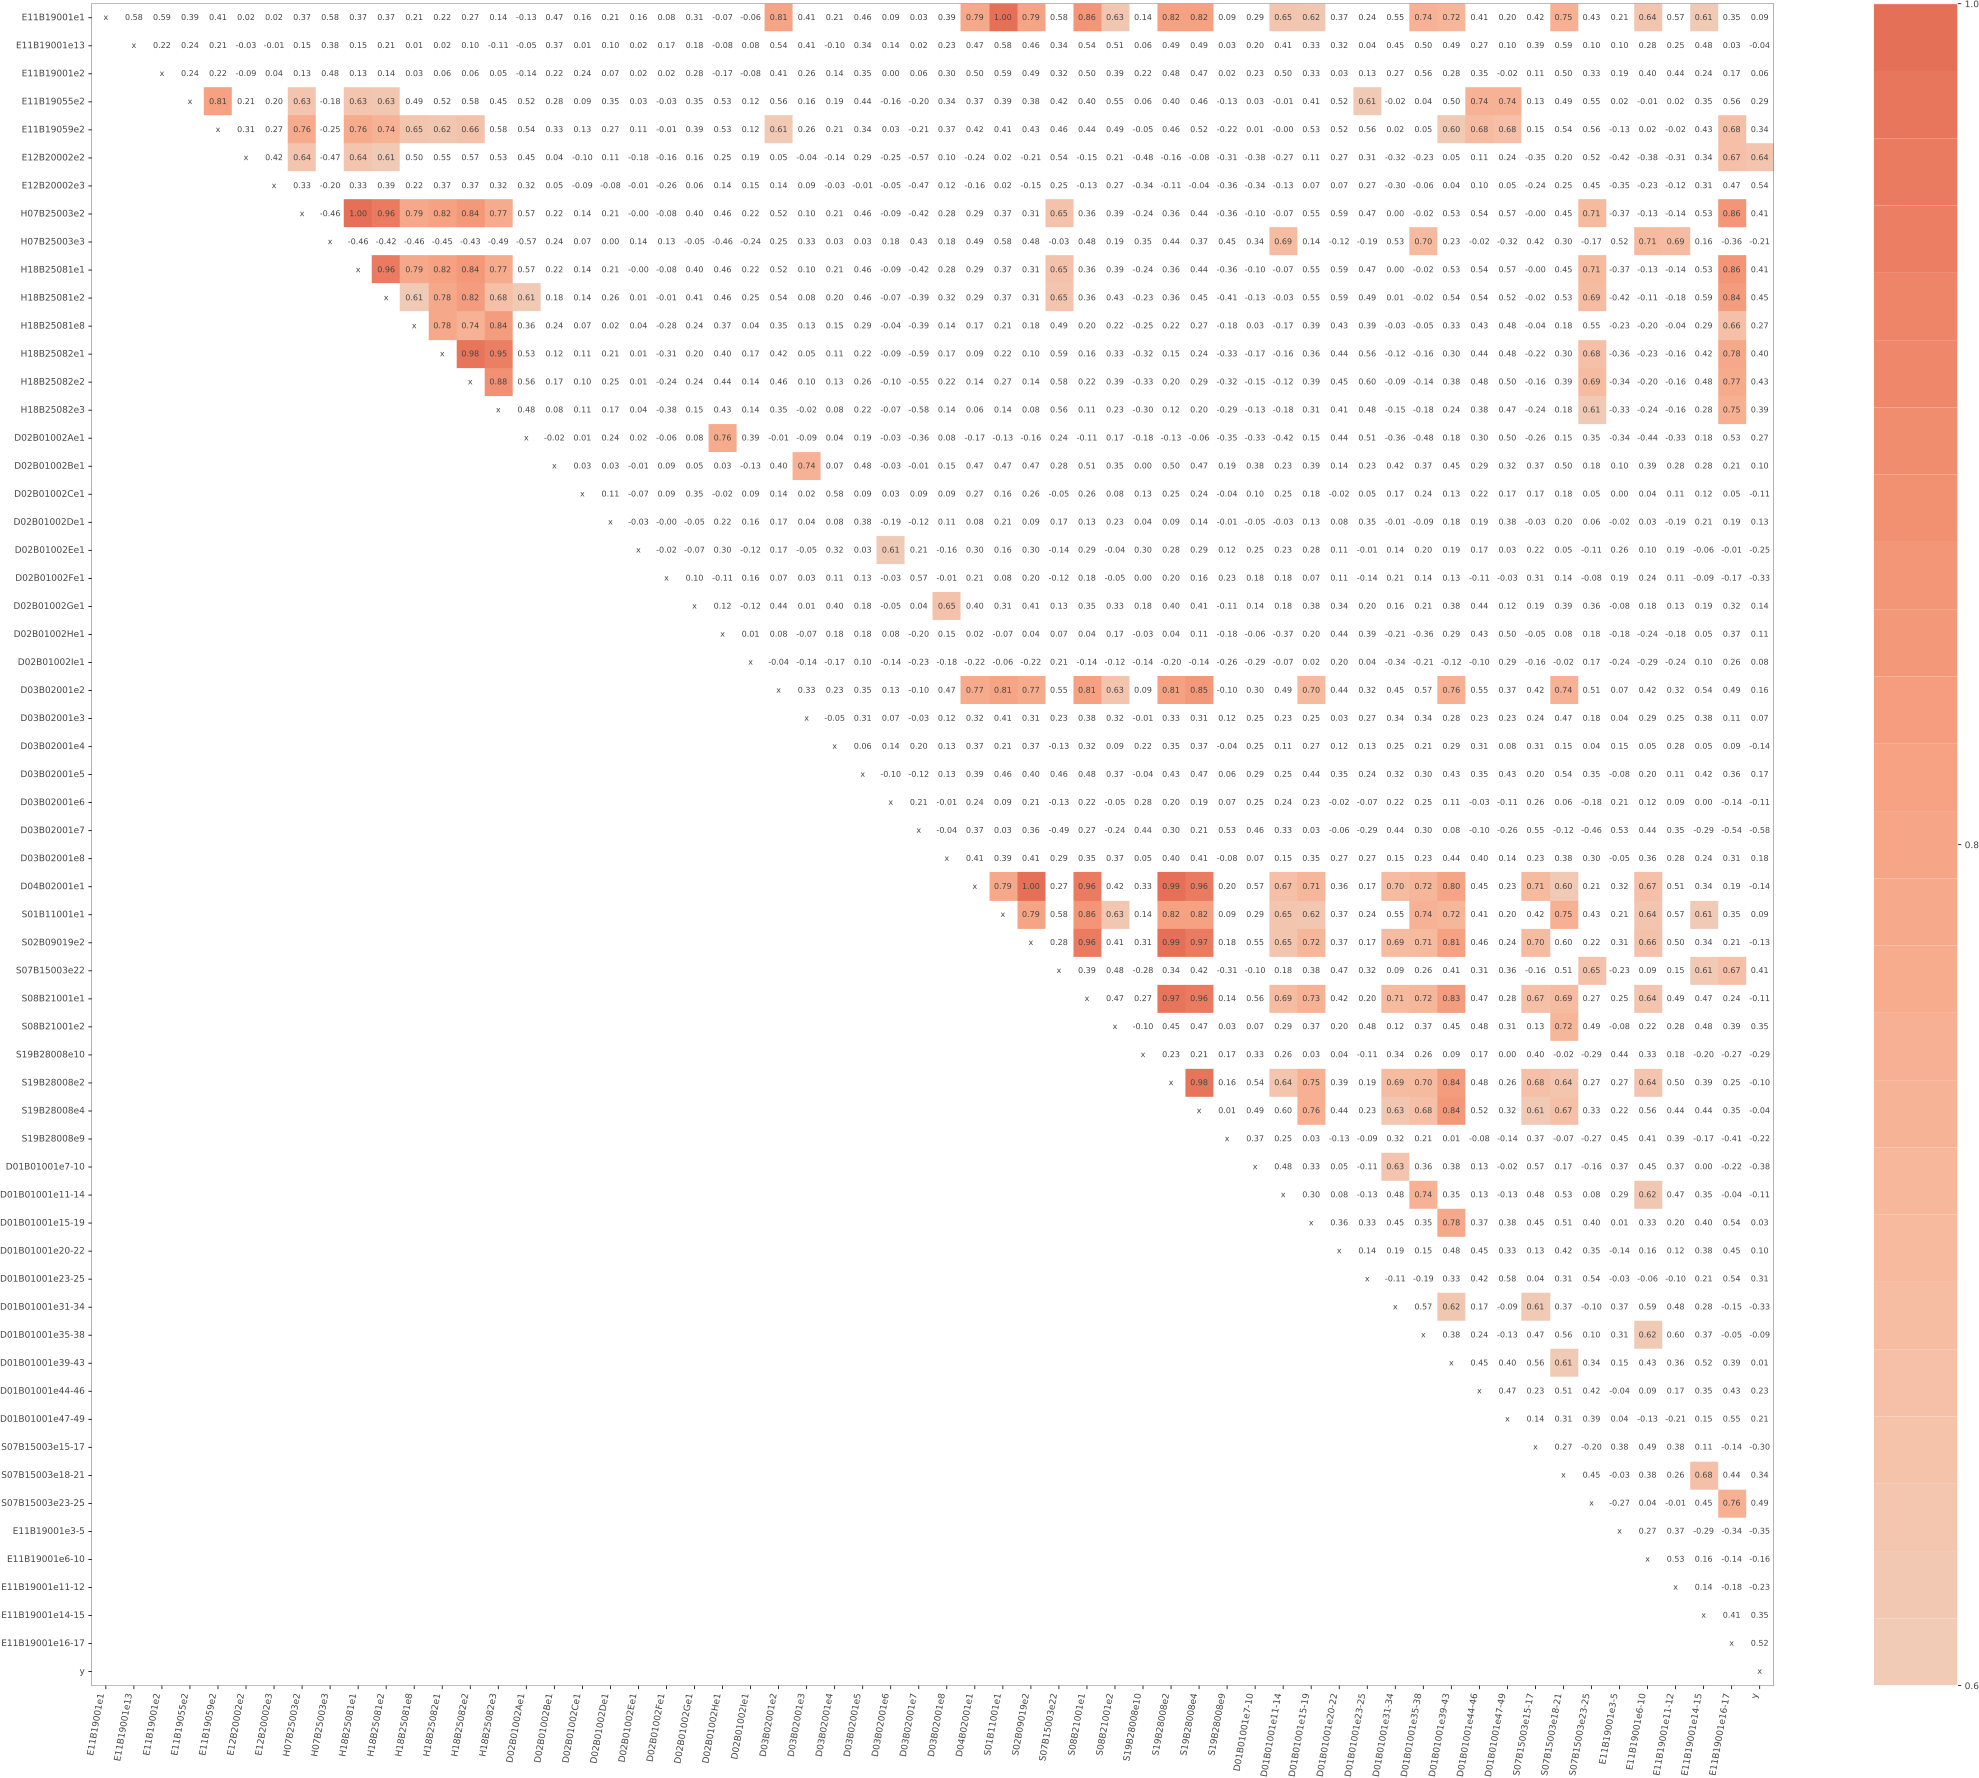

In [35]:
from rfpimp import plot_corr_heatmap
viz = plot_corr_heatmap(df_train, figsize=(35,25))
viz.save('./corrheatmap.svg')
viz

### In the correlation heatmap, we confirmed that E12B20002e2 is the most siginificant feature